In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pydicom

# Question 3.

## Load files

In [2]:
raw_imag = np.load('rawMRData_Imag.npy')
raw_real = np.load('rawMRData_Real.npy')

In [3]:
print("imag",raw_imag[0])
print("real", raw_real)

imag [[    0.             0.             0.         ...     0.
      0.             0.        ]
 [ -307.16335925   126.41831156   222.87878243 ...  -322.27105589
     -6.82128709  -257.50026939]
 [   78.09683771  -381.66505538 -1108.227088   ...   -62.36681995
   -109.54751503   682.89751425]
 ...
 [   70.35560005   207.71835678 -1169.3663127  ...   -97.49429305
   -442.08451987  -561.50998866]
 [  -78.09683771   381.66505538  1108.227088   ...    62.36681995
    109.54751503  -682.89751425]
 [  307.16335925  -126.41831156  -222.87878243 ...   322.27105589
      6.82128709   257.50026939]]
real [[[-2.31000000e+02  3.80000000e+02 -1.19600000e+03 ...  3.44000000e+02
    3.15000000e+02  1.63000000e+02]
  [ 2.87876877e+01 -4.80506060e+02  6.12457991e+02 ...  3.52869845e+02
   -2.77951657e+01 -1.35828885e+02]
  [ 3.91551393e+02 -2.41758422e+01 -1.00030854e+02 ... -4.38472315e+02
   -4.23302094e+02  3.17749690e+01]
  ...
  [-5.79825566e+02  1.08987660e+03 -3.77807117e+01 ... -4.39850667e+02


In [4]:
raw_imag.shape, raw_real.shape

((384, 512, 36), (384, 512, 36))

## complex data

In [5]:
complex_data = raw_real + 1j * raw_imag
print(complex_data)

[[[-2.31000000e+02   +0.j          3.80000000e+02   +0.j
   -1.19600000e+03   +0.j         ...  3.44000000e+02   +0.j
    3.15000000e+02   +0.j          1.63000000e+02   +0.j        ]
  [ 2.87876877e+01 -307.16335925j -4.80506060e+02 +126.41831156j
    6.12457991e+02 +222.87878243j ...  3.52869845e+02 -322.27105589j
   -2.77951657e+01   -6.82128709j -1.35828885e+02 -257.50026939j]
  [ 3.91551393e+02  +78.09683771j -2.41758422e+01 -381.66505538j
   -1.00030854e+02-1108.227088j   ... -4.38472315e+02  -62.36681995j
   -4.23302094e+02 -109.54751503j  3.17749690e+01 +682.89751425j]
  ...
  [-5.79825566e+02  +70.35560005j  1.08987660e+03 +207.71835678j
   -3.77807117e+01-1169.3663127j  ... -4.39850667e+02  -97.49429305j
   -1.84086803e+01 -442.08451987j -1.69127301e+02 -561.50998866j]
  [ 3.91551393e+02  -78.09683771j -2.41758422e+01 +381.66505538j
   -1.00030854e+02+1108.227088j   ... -4.38472315e+02  +62.36681995j
   -4.23302094e+02 +109.54751503j  3.17749690e+01 -682.89751425j]
  [ 2.8787

In [6]:
complex_data.shape # 데이터 사이즈 확인 384 × 512 × 36

(384, 512, 36)

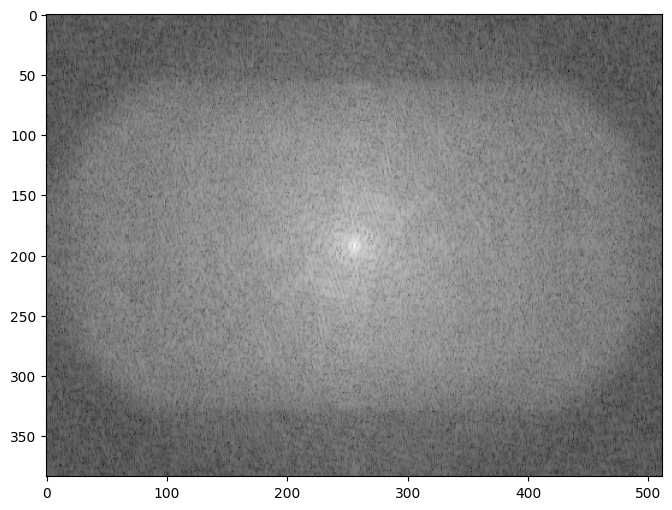

In [7]:
tmp = complex_data[:, :, 15]
plt.figure(figsize=(10, 6))
plt.imshow(20*np.log10(np.abs(tmp)), cmap='gray')
plt.show()

# Quesion 4.

In [8]:
nx, ny, slices = complex_data.shape

recon = np.zeros((nx, ny, slices), dtype=float)
for l in range(slices):
    shift = np.fft.fftshift(complex_data[:, :, l])
    img = np.fft.ifft2(shift)
    recon[:, :, l] = np.abs(img)

In [9]:
recon

array([[[2.39785044e-14, 1.44745327e-14, 2.74086309e-15, ...,
         5.24811676e-15, 1.17197918e-14, 6.57113253e-15],
        [5.45859654e-16, 2.50031477e-14, 1.10293719e-14, ...,
         2.94706389e-14, 5.20417043e-17, 1.24460627e-14],
        [3.77013235e-15, 1.75854701e-14, 2.71079455e-15, ...,
         3.02165700e-14, 1.39494897e-14, 1.25397378e-14],
        ...,
        [5.99231313e-15, 2.58913261e-14, 3.08803908e-14, ...,
         1.76016609e-14, 2.27595720e-14, 7.47550170e-15],
        [2.37917325e-15, 4.66987560e-15, 3.56624452e-14, ...,
         2.66453526e-15, 1.12641378e-14, 6.95739762e-15],
        [3.76111179e-14, 1.27906944e-14, 6.53412509e-15, ...,
         3.72815205e-14, 2.42861287e-16, 5.88533851e-15]],

       [[1.68361155e-14, 1.21464688e-14, 3.02237503e-15, ...,
         3.40497948e-15, 1.48964877e-14, 3.32500066e-16],
        [6.62007375e-15, 2.34355963e-14, 1.03180715e-14, ...,
         2.40115682e-14, 1.18313080e-14, 1.89132906e-14],
        [6.52943056e-15, 

In [11]:
recon.shape

(384, 512, 36)

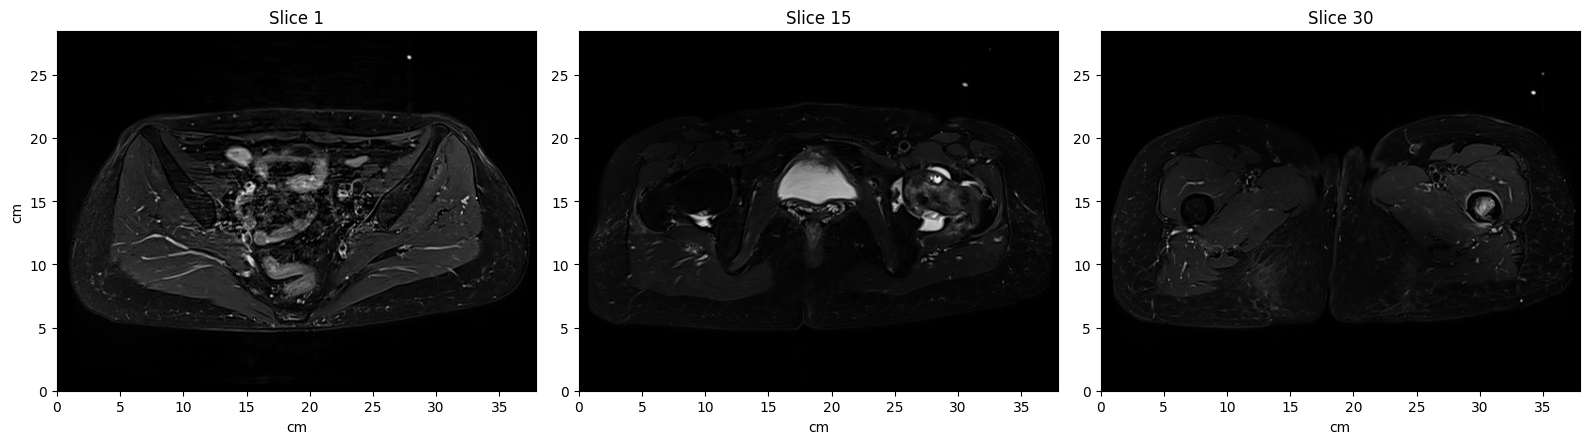

In [12]:
spacing_cm = 0.7422 / 10

x = np.arange(ny) * spacing_cm
y = np.arange(nx) * spacing_cm
extent = [x[0], x[-1], y[0], y[-1]]

slice_ex = [1, 15, 30]
plt.figure(figsize=(16,10))
for idx, l in enumerate(slice_ex, 1):
    ax = plt.subplot(1, len(slice_ex), idx)
    ax.imshow(recon[:, :, l], cmap='gray', extent=extent)
    ax.set_xlabel('cm')
    if idx == 1:
        ax.set_ylabel('cm')
    ax.set_title(f'Slice {l}')
plt.tight_layout()
plt.show()

# Question 5.

In [13]:
blind_path = 'blind'
new_dicom = 'new_dicom'

In [14]:
tmp_list = os.listdir(blind_path)
print(tmp_list)

['000001.dcm', '000034.dcm', '000031.dcm', '000021.dcm', '000004.dcm', '000029.dcm', '000020.dcm', '000032.dcm', '000003.dcm', '000014.dcm', '000030.dcm', '000024.dcm', '000010.dcm', '000012.dcm', '000002.dcm', '000026.dcm', '000015.dcm', '000007.dcm', '000027.dcm', '000018.dcm', '000006.dcm', '000035.dcm', '000028.dcm', '000008.dcm', '000033.dcm', '000005.dcm', '000017.dcm', '000013.dcm', '000000.dcm', '000009.dcm', '000016.dcm', '000011.dcm', '000019.dcm', '000023.dcm', '000025.dcm', '000022.dcm']


##### 데이터를 살펴보면 'Patient's Name' 등의 개인정보가 가려져 있다.

In [15]:
fname = 'blind/000001.dcm'
tmp_dcm = pydicom.dcmread(fname)

print(tmp_dcm)


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 226
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.374532541111692656838642103101509136506
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002,0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
(0002,0016) Source Application Entity Title     AE: 'MAROTECH'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'WATER', 'NORM', 'DIS2D', 'FM', 'FIL']
(0008,0012) Instance Creation Date              DA: '20180528'
(0008,0013) Instance Creation Time              TM:

##### 모든 픽셀 값이 0으로 되어있는지 확인

In [16]:
tmp_dcm.pixel_array 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [ ]:
for name in sorted(os.listdir(blind_path)):
    path_in = os.path.join(blind_path, name)
    data = pydicom.dcmread(path_in)

    l = int(os.path.splitext(name)[0]) # 파일명을 슬라이스 인덱스로
    img = recon[:, :, l] # 3D 재구성 recon에서 2D 이미지 가져오기

    img_max = img.max()
    if img_max == 0:
        img_norm = np.zeros_like(img, dtype=np.uint16)
    else:
        img_norm = (img / img_max * np.iinfo(np.uint16).max).astype(np.uint16)

    data.Rows, data.Columns = img_norm.shape
    data.PixelData = img_norm.tobytes()

    path_out = os.path.join(new_dicom, name)
    data.save_as(path_out)

print("완료")

완료
